# WeatherPy
----

#### My Observations
* ........

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [3]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,,,,,,,,
1,saldanha,,,,,,,,
2,attawapiskat,,,,,,,,
3,arraial do cabo,,,,,,,,
4,bredasdorp,,,,,,,,


In [4]:
# Performing the API calls and printing the log all at once:
# city_index = 0

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("----------------------------------------")
print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

city_num = 1
city_set = 1

for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    
    print(f"Processing records: {city_num} of Set {city_set} | {city}")

    try:
        city_num += 1
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming...")
        pass
    
    if city_num == 51:
        city_set += 1
        city_num = 1
        
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

----------------------------------------
Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of Set 1 | mataura
Processing records: 2 of Set 1 | saldanha
Processing records: 3 of Set 1 | attawapiskat
City not found. Resuming...
Processing records: 4 of Set 1 | arraial do cabo
Processing records: 5 of Set 1 | bredasdorp
Processing records: 6 of Set 1 | taburi
City not found. Resuming...
Processing records: 7 of Set 1 | tuktoyaktuk
Processing records: 8 of Set 1 | ponta do sol
Processing records: 9 of Set 1 | port alfred
Processing records: 10 of Set 1 | ushuaia
Processing records: 11 of Set 1 | puerto ayora
Processing records: 12 of Set 1 | hermanus
Processing records: 13 of Set 1 | alice springs
Processing records: 14 of Set 1 | atuona
Processing records: 15 of Set 1 | cidreira
Processing records: 16 of Set 1 | haibowan
City not found. Resuming...
Processing records: 17 of Set 1 | nokaneng
Processing records: 18 of Set 1 | butaritari
Processing reco

Processing records: 25 of Set 4 | uchiza
Processing records: 26 of Set 4 | wattegama
Processing records: 27 of Set 4 | hamilton
Processing records: 28 of Set 4 | gurupi
Processing records: 29 of Set 4 | mazagao
Processing records: 30 of Set 4 | severo-kurilsk
Processing records: 31 of Set 4 | blackwater
Processing records: 32 of Set 4 | hofn
Processing records: 33 of Set 4 | trinidad
Processing records: 34 of Set 4 | tasiilaq
Processing records: 35 of Set 4 | mys shmidta
City not found. Resuming...
Processing records: 36 of Set 4 | khasan
Processing records: 37 of Set 4 | ahipara
Processing records: 38 of Set 4 | vanimo
Processing records: 39 of Set 4 | plettenberg bay
Processing records: 40 of Set 4 | new norfolk
Processing records: 41 of Set 4 | olafsvik
Processing records: 42 of Set 4 | kroya
Processing records: 43 of Set 4 | grand gaube
Processing records: 44 of Set 4 | shwebo
Processing records: 45 of Set 4 | chuy
Processing records: 46 of Set 4 | sao paulo de olivenca
Processing 

Processing records: 6 of Set 8 | praia da vitoria
Processing records: 7 of Set 8 | bonavista
Processing records: 8 of Set 8 | tilichiki
Processing records: 9 of Set 8 | atambua
Processing records: 10 of Set 8 | muli
Processing records: 11 of Set 8 | tamiahua
Processing records: 12 of Set 8 | nueve de julio
Processing records: 13 of Set 8 | sistranda
Processing records: 14 of Set 8 | ostersund
Processing records: 15 of Set 8 | palabuhanratu
City not found. Resuming...
Processing records: 16 of Set 8 | anadyr
Processing records: 17 of Set 8 | mbandaka
Processing records: 18 of Set 8 | lompoc
Processing records: 19 of Set 8 | vallenar
Processing records: 20 of Set 8 | arona
Processing records: 21 of Set 8 | zeya
Processing records: 22 of Set 8 | mutsamudu
City not found. Resuming...
Processing records: 23 of Set 8 | nicoya
Processing records: 24 of Set 8 | palana
Processing records: 25 of Set 8 | shchelyayur
City not found. Resuming...
Processing records: 26 of Set 8 | san cristobal
Proce

In [5]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,49.84,78,30,7.07,NZ,1594435433
1,Saldanha,-33.01,17.94,51.80,81,75,12.75,ZA,1594435451
2,Arraial do Cabo,-22.97,-42.03,69.55,76,32,16.62,BR,1594435425
3,Bredasdorp,-34.53,20.04,50.00,81,70,16.11,ZA,1594435434
4,Tuktoyaktuk,69.45,-133.04,42.80,87,75,12.75,CA,1594435452
5,Ponta do Sol,32.67,-17.10,68.59,64,20,14.99,PT,1594435425
6,Port Alfred,-33.59,26.89,61.00,56,35,10.00,ZA,1594435434
7,Ushuaia,-54.80,-68.30,33.80,80,20,3.36,AR,1594435228
8,Puerto Ayora,-0.74,-90.35,66.99,95,92,7.38,EC,1594435437
9,Hermanus,-34.42,19.23,51.01,87,95,8.99,ZA,1594435433


In [6]:
cities_pd.count()

City               542
Latitude           542
Longitude          542
Max Temperature    542
Humidity           542
Cloudiness         542
Wind Speed         542
Country            542
Date               542
dtype: int64

In [7]:
# Converting the city data into a 'csv' file:
# Output File (CSV)
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Find the cities with humidity that is over 100%:

humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

#This shows that this particular collection of cities does not have humidity over 100%:

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
521,Keflavik,64.00,-22.56,48.87,100,90,9.17,IS,1594435609
537,Ocós,14.51,-92.19,75.20,100,40,2.24,GT,1594435613
411,Grindavik,63.84,-22.43,48.20,100,90,9.17,IS,1594435583
235,Salalah,17.02,54.09,80.60,100,90,6.93,OM,1594435452
300,Bar Harbor,44.39,-68.20,62.24,100,90,7.11,US,1594435560
...,...,...,...,...,...,...,...,...,...
94,Cedar City,37.68,-113.06,89.60,13,1,10.29,US,1594435511
430,Pahrump,36.21,-115.98,100.99,12,0,1.01,US,1594435589
66,Saint George,37.10,-113.58,100.27,12,1,11.41,US,1594435429
268,West Wendover,40.74,-114.07,89.60,11,1,4.68,US,1594435553


## Latitude vs. Temperature Plot

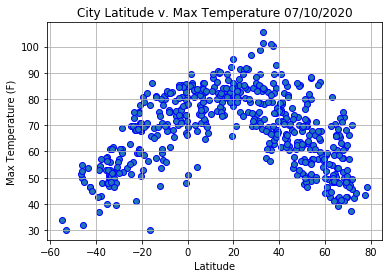

In [9]:
# Plotting 'Latitude v. Max Temperature':
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Max Temperature 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('../OutputData/Fig1.png')
plt.show()

* This plot, 'City Latitude v. Max Temperature', illustrates that the temperatures are higher in the cities closer to the Equator. Therefore, the temperatures lower in the cities closer to the North and South poles. In this plot, there is a city with the highest temperature at about 20 degrees North of the equator.

## Latitude vs. Humidity Plot

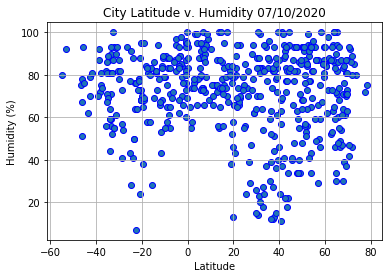

In [10]:
# Plotting latitude v. humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Humidity 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('../OutputData/Fig2.png')
plt.show()

* This plot, 'City Latitude v. Humidity', illustrates that the humidity can range anywhere from about 3-100% in cities between 20 and 50 deegrees North. Meanwhile, at the Equator (and regions close by) are usually high in humidity ranging from 50-100%.

## Latitude vs. Cloudiness Plot

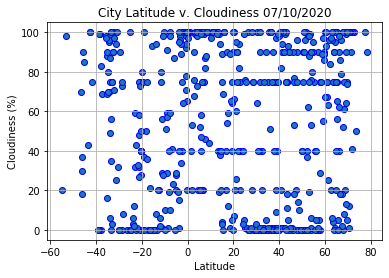

In [11]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Cloudiness 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('../OutputData/Fig3.png')
plt.show()

* This plot, 'City Latitude v. Cloudiness', illustrates that cloudiness is all over the place no matter where in the world you may be. Digging deeper, several cities closest to the Equator are mostly at 100% cloudiness meaning they have very cloudy skies. Meanwhile, the several cities between -10 to -45 degrees South as well as 25 to 70 degrees North have clear skies on this date.

## Latitude vs. Wind Speed Plot

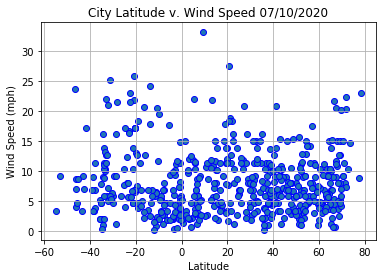

In [12]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Wind Speed 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('../OutputData/Fig4.png')
plt.show()

* This plot, 'City Latitude v. Wind Speed', illustrates that the highest wind speeds are in a city near 30 degrees North on this date. 

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrame

# Northern Hemisphere (on Latitude from 0 to 90 degrees):
northern_hemi = cities_pd.loc[(cities_pd['Latitude'] >= 0)]
northern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
4,Tuktoyaktuk,69.45,-133.04,42.80,87,75,12.75,CA,1594435452
5,Ponta do Sol,32.67,-17.10,68.59,64,20,14.99,PT,1594435425
14,Butaritari,3.07,172.79,82.92,77,99,12.01,KI,1594435440
17,Sørland,67.67,12.69,52.20,83,52,20.51,NO,1594435431
19,Albany,42.60,-73.97,74.17,91,99,6.64,US,1594435432
...,...,...,...,...,...,...,...,...,...
536,Andenes,69.31,16.12,48.20,87,64,4.70,NO,1594435368
537,Ocós,14.51,-92.19,75.20,100,40,2.24,GT,1594435613
538,Barentu,15.11,37.59,73.67,74,3,5.82,ER,1594435614
540,Chara,56.91,118.26,85.55,29,1,17.49,RU,1594435614


In [14]:
# This will show me the cities farthest and closest in the Northern Hemisphere:
north_high_to_low = northern_hemi.sort_values('Latitude', ascending=False)
north_high_to_low

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
71,Longyearbyen,78.22,15.64,46.40,75,90,23.04,SJ,1594435330
129,Qaanaaq,77.48,-69.36,43.48,72,100,8.88,GL,1594435431
95,Dikson,73.51,80.55,44.08,80,50,14.74,RU,1594435431
55,Upernavik,72.79,-56.15,42.37,85,100,10.38,GL,1594435185
251,Khatanga,71.97,102.50,49.48,89,100,20.38,RU,1594435439
...,...,...,...,...,...,...,...,...,...
464,Bairiki Village,1.33,172.98,89.60,55,40,14.99,KI,1594435430
253,Ternate,0.80,127.40,84.85,65,100,1.30,ID,1594435550
199,Otavalo,0.23,-78.27,51.10,83,97,2.73,EC,1594435250
531,Bontang,0.13,117.50,78.10,88,100,5.26,ID,1594435424


In [15]:
# Southern Hemisphere (on Latitude less than 0 degrees):
southern_hemi = cities_pd.loc[(cities_pd['Latitude'] < 0)]
southern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,49.84,78,30,7.07,NZ,1594435433
1,Saldanha,-33.01,17.94,51.80,81,75,12.75,ZA,1594435451
2,Arraial do Cabo,-22.97,-42.03,69.55,76,32,16.62,BR,1594435425
3,Bredasdorp,-34.53,20.04,50.00,81,70,16.11,ZA,1594435434
6,Port Alfred,-33.59,26.89,61.00,56,35,10.00,ZA,1594435434
...,...,...,...,...,...,...,...,...,...
511,Paragominas,-2.97,-47.48,71.01,98,34,3.22,BR,1594435607
512,Whyalla,-33.03,137.58,51.80,81,75,11.41,AU,1594435607
527,Cradock,-32.16,25.62,46.27,55,97,21.07,ZA,1594435611
535,San Jerónimo,-11.95,-75.28,46.89,67,2,1.54,PE,1594435459


In [16]:
# This will show me the cities closest and farthest in the Southern Hemisphere:
south_low_to_high = southern_hemi.sort_values('Latitude', ascending=True)
south_low_to_high

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
7,Ushuaia,-54.80,-68.30,33.80,80,20,3.36,AR,1594435228
48,Punta Arenas,-53.15,-70.92,30.09,92,98,9.17,CL,1594435431
16,Bluff,-46.60,168.33,51.35,75,70,23.67,NZ,1594435432
34,Kaitangata,-46.28,169.85,55.00,51,18,4.00,NZ,1594435150
0,Mataura,-46.19,168.86,49.84,78,30,7.07,NZ,1594435433
...,...,...,...,...,...,...,...,...,...
53,Hithadhoo,-0.60,73.08,83.68,73,94,8.25,MV,1594435446
419,Loa Janan,-0.58,117.09,77.67,93,100,3.91,ID,1594435586
539,Owando,-0.48,15.90,71.55,95,100,2.66,CG,1594435614
380,Masaka,-0.33,31.73,66.25,69,65,1.92,UG,1594435578


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4539312708038058


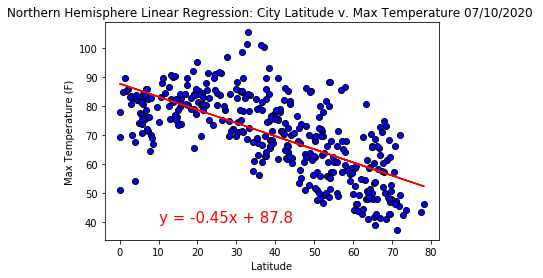

In [17]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Max Temperature':
x = northern_hemi['Latitude']
y = northern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,40), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Max Temperature 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5891091870264064


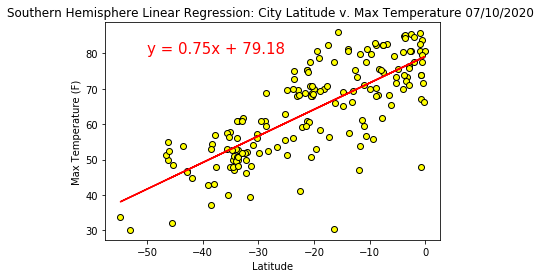

In [18]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Max Temperature':
x = southern_hemi['Latitude']
y = southern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,80), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Max Temperature 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig6.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a downward trend that temperatures decrease steadily as you travel farther up North.
    * In the Southern Hemisphere, there is an upward trend that shows temperatures rise steadily as you travel closer to the Equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0041966588371279345


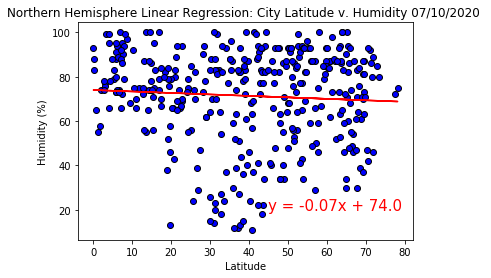

In [19]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Humidity':
x = northern_hemi['Latitude']
y = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(45,20), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Humidity 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016677880408364498


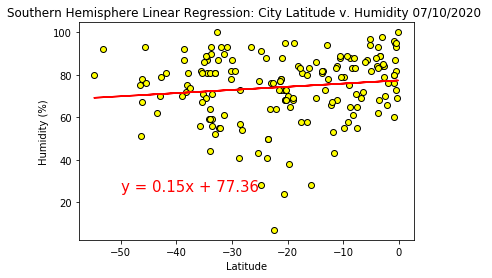

In [20]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Humidity':
x = southern_hemi['Latitude']
y = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,25), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Humidity 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig8.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a very small, slight upward regression. The humidity is lowest amongst the cities between 20 to 50 degrees North as well as -5 to -30 degrees South.
    * In the Southern Hemisphere, there is a downward regression. The humidity in both hemispheres show a consistent relationship that the humidity is generally highest amongst the cities near the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005171625677534105


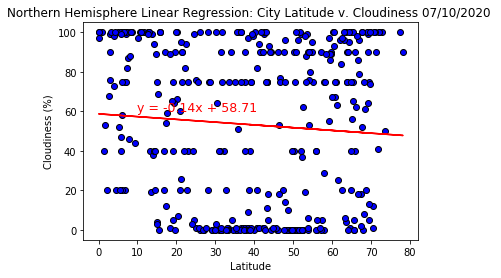

In [21]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Cloudiness':
x = northern_hemi['Latitude']
y = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,60), fontsize=12.5, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Cloudiness 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000255349212734405


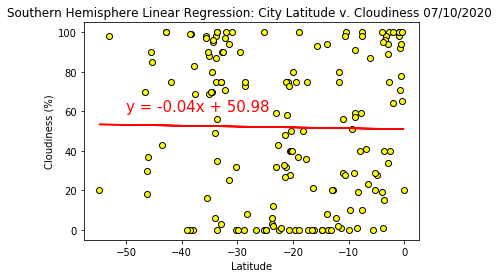

In [22]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Cloudiness':
x = southern_hemi['Latitude']
y = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,60), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Cloudiness 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig10.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere the cloudiness is basically evenly dispersed across the entire hemisphere. No one particular region or accumulation of cities occurs. Looking closely, there are a higher concentration of cities that have no cloud coverage between 25-55 degrees North.
    * Simiarly, the Southern Hemisphere, the scatter points are somewhat dispersed but there seems to be a higher concentration of cloudiness amongst cities near the Equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011172724664090035


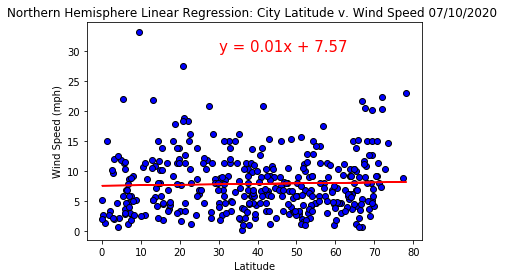

In [23]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Wind Speed':
x = northern_hemi['Latitude']
y = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(30,30), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Wind Speed 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03034449849749382


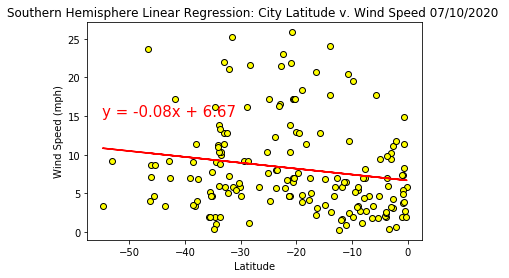

In [24]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Wind Speed':
x = southern_hemi['Latitude']
y = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-55,15), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Wind Speed 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig12.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * In this last pair of plots, both the Northern and Southern Hemispheres were very similar. There seems to be only one city in each hemisphere where they are experiencing winds at about 30-35 mph.

In [ ]:
cities_pd.unique()
cities_pd